In [ ]:
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/linshoufan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


"categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']\ntwenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)"

In [2]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [3]:
import sys
print(sys.executable) # c:\<your path to the project directory>\.venv\Scripts\python.exe
print(sys.version) #3.11.0

/Users/linshoufan/Documents/清大/資料探勘與應用/hw1/DM2025Labs/DM2025-Lab1-Exercise/.venv/bin/python
3.11.0 (main, Sep 21 2025, 19:05:57) [Clang 15.0.0 (clang-1500.3.9.4)]


## 1. The Data

In [30]:
#categories
categories = ['StockMarket',
              'stocks',
              'stockstobuytoday',
              'wallstreetbets']

In [ ]:
# only need subreddit, text, label field
DATA_PATH = "newdataset/Reddit-stock-sentiment.csv"
df = pd.read_csv(DATA_PATH)
df = df[['subreddit', 'text', 'label']]
df = df.rename(columns={'subreddit': 'category_name', 'text': 'text', 'label': 'label'})

# turn into list
data = df['text'].tolist()
labels = df['category_name'].tolist()
# build DataFrame
X = pd.DataFrame({'text': data, 'category_name': labels})
print(X.head())

                                                text     category_name
0                                   Calls on retards    wallstreetbets
1  Stunt as in like why did they even make a big ...    wallstreetbets
2                  Seeing lots of red in the ticker.       StockMarket
3  Vision Marine Technologies Inc. is rewriting t...  stockstobuytoday
4                           He didn’t say thank you.       StockMarket


In [ ]:
"""for t in twenty_train.target[:10]:
    print(twenty_train.target_names[t])"""

comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


---

In [ ]:
"""# Answer here
for i in range(3):
    print(f"example {i + 1}")
    print("\n".join(twenty_train.data[i].split("\n")))"""

example 1
From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

example 2
From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectan

In [ ]:
"""import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])"""

In [8]:
len(X)

847

In [9]:
X[0:2]

,text,category_name
0,Calls on retards,wallstreetbets
1,Stunt as in like why did they even make a big ...,wallstreetbets


In [10]:
for t in X["text"][:2]:
    print(t)

Calls on retards
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.


In [11]:
# a simple query
X[:10][["text","category_name"]]

,text,category_name
0,Calls on retards,wallstreetbets
1,Stunt as in like why did they even make a big ...,wallstreetbets
2,Seeing lots of red in the ticker.,StockMarket
3,Vision Marine Technologies Inc. is rewriting t...,stockstobuytoday
4,He didn’t say thank you.,StockMarket
5,"Hoping to ejaculate in wet warm puss tonight, ...",wallstreetbets
6,Trump will respond to china increasing their t...,stocks
7,Confirmed not a trap. Its been like this for p...,wallstreetbets
8,Am I the only one seeing the cup & handle brea...,stocks
9,HLGN is $10. Hurry and catch it now before it ...,stockstobuytoday


### Exercise 2

In [12]:
#Answer here
print("exercise 2-1\n")
print(X.loc[5:14, ['text', 'category_name']]) # rows 5 to 14 and specified columns

print("\nexercise 2-2\n")
print(X.iloc[20:25, :]) # rows 20 to 24 and all columns

print("\nexercise 2-3\n")
print(X.loc[50]) # row 50 and all columns

print("\nexercise 2-4\n")
print(X.iloc[100, 1:3]) # row 100 and columns 1 to 2

print("\nexercise 2-5\n")
print(X.sample(2)["category_name"]) # random sample of 2 category names

exercise 2-1

                                                 text     category_name
5   Hoping to ejaculate in wet warm puss tonight, ...    wallstreetbets
6   Trump will respond to china increasing their t...            stocks
7   Confirmed not a trap. Its been like this for p...    wallstreetbets
8   Am I the only one seeing the cup & handle brea...            stocks
9   HLGN is $10. Hurry and catch it now before it ...  stockstobuytoday
10       It's a copy/paste from a Bloomberg terminal.            stocks
11  this sub has ruined emails for me, whenever I ...    wallstreetbets
12  Honestly let the economy burn, maybe people wi...            stocks
13  \nI’ve been doing pretty good with this, but i...            stocks
14                     USA begging China to call them            stocks

exercise 2-2

                                                 text     category_name
20                Nooo dont go down its smug bull day            stocks
21                                 

In [13]:
X[X["category_name"] == "StockMarket"][::10][0:5]

,text,category_name
2,Seeing lots of red in the ticker.,StockMarket
62,Comedy gold :)),StockMarket
94,I can’t take four years of lying. Help!,StockMarket
113,\nAn evil man will burn his own nation to the ...,StockMarket
146,He reached this level only because of his inhe...,StockMarket


In [18]:
import helpers.data_mining_helpers as dmh
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category_name
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [ ]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

### 5.3 Feature subset selection

In [20]:
X_sample = X.sample(n=500) #random state

In [21]:
len(X_sample)

500

In [22]:
X_sample[0:4]

,text,category_name
412,How do yall buy new cryptos?,stockstobuytoday
447,What’s your favorite flavor of Crayola?,wallstreetbets
171,Mango's insider trading club: Let's nuke it fr...,wallstreetbets
121,BYDDY mark my words.,stockstobuytoday


In [23]:
# Answer here

# exercise 6-1
# the changes in count and percentage are evident
full_counts = X['category_name'].value_counts()
full_percent = (X['category_name'].value_counts(normalize=True) * 100).round(2)

full_df = pd.DataFrame({
    'count': full_counts,
    'percentage': full_percent
}).reset_index().rename(columns={'index': 'category_name'})
print("Full dataset category distribution:\n", full_df)

sample_counts = X_sample['category_name'].value_counts()
sample_percent = (X_sample['category_name'].value_counts(normalize=True) * 100).round(2)
sample_df = pd.DataFrame({
    'count': sample_counts,
    'percentage': sample_percent
}).reset_index().rename(columns={'index': 'category_name'})

print("\nSample subset category distribution:\n", sample_df)

# exercise 6-2
# index of full dataset are continuous
print("\nFull dataset index range:", X.index[:10].tolist())
# index of sampled dataset are not continuous
print("Sample subset index example (first 10 rows):", X_sample.index[:10].tolist())

Full dataset category distribution:
       category_name  count  percentage
0            stocks    274       32.35
1       StockMarket    250       29.52
2  stockstobuytoday    174       20.54
3    wallstreetbets    149       17.59

Sample subset category distribution:
       category_name  count  percentage
0            stocks    162        32.4
1       StockMarket    155        31.0
2  stockstobuytoday    100        20.0
3    wallstreetbets     83        16.6

Full dataset index range: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Sample subset index example (first 10 rows): [412, 447, 171, 121, 54, 680, 245, 821, 774, 692]


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
categories

['StockMarket',
 'sh_avgvol_o2000',
 'stocks',
 'stockstobuytoday',
 'wallstreetbets']

category_name
stocks              274
StockMarket         250
stockstobuytoday    174
wallstreetbets      149
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

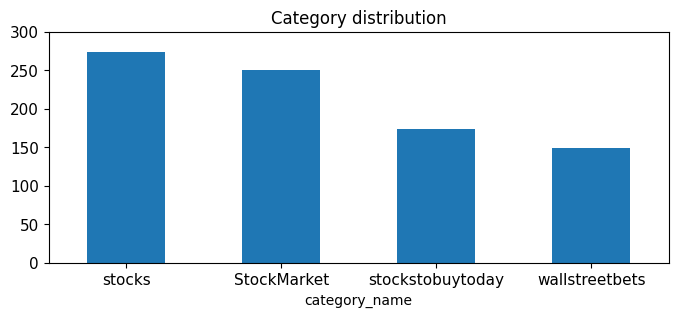

In [28]:
print(X.category_name.value_counts())

# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 300],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

category_name
stocks              162
StockMarket         155
stockstobuytoday    100
wallstreetbets       83
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

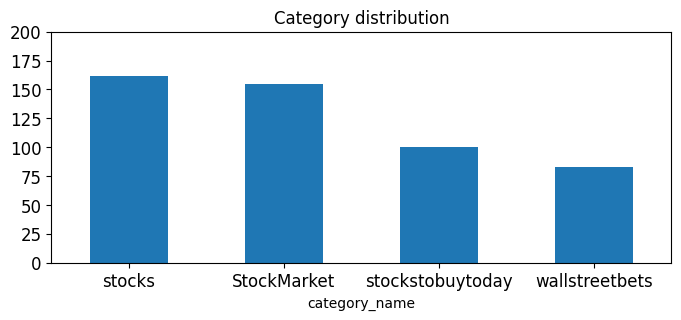

In [29]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 200], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

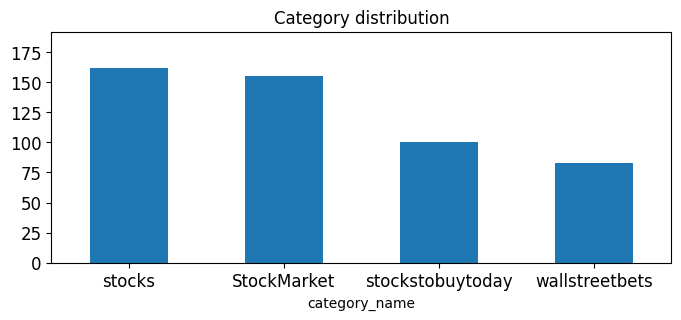

In [31]:
# Answer here

X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, X_sample.category_name.value_counts().max() + 30], 
                                           rot = 0, fontsize = 12, figsize = (8, 3))

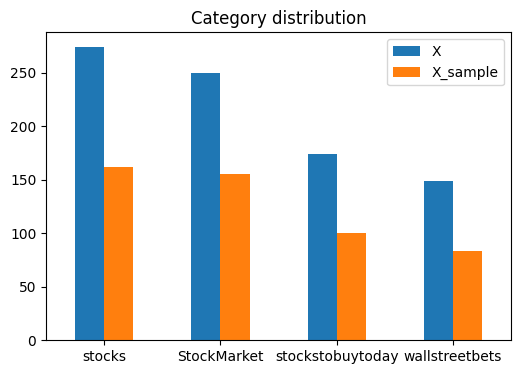

In [32]:
# Answer here

combined = X['category_name'].value_counts().rename("X").to_frame().join(
    X_sample['category_name'].value_counts().rename("X_sample").to_frame()
)

combined = combined.sort_values(by = "X", ascending = False)
combined.index.name = None

combined.plot(kind = 'bar', figsize = (6, 4))
plt.title('Category distribution')
plt.xticks(rotation = 0)
plt.legend(loc = 'upper right')
plt.show()

In [33]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/linshoufan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/linshoufan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [34]:
# takes a like a minute or two to process

X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [35]:
X[0:4]["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object

In [36]:
X[0:4]

,text,category_name,unigrams
0,Calls on retards,wallstreetbets,"[Calls, on, retards]"
1,Stunt as in like why did they even make a big ...,wallstreetbets,"[Stunt, as, in, like, why, did, they, even, ma..."
2,Seeing lots of red in the ticker.,StockMarket,"[Seeing, lots, of, red, in, the, ticker, .]"
3,Vision Marine Technologies Inc. is rewriting t...,stockstobuytoday,"[Vision, Marine, Technologies, Inc., is, rewri..."


In [39]:
list(X[0:2]['unigrams'])

[['Calls', 'on', 'retards'],
 ['Stunt',
  'as',
  'in',
  'like',
  'why',
  'did',
  'they',
  'even',
  'make',
  'a',
  'big',
  'deal',
  'about',
  'starting',
  'it',
  'in',
  'the',
  'first',
  'place',
  '?',
  'No',
  'company',
  'should',
  'ever',
  'talk',
  'about',
  'politics',
  'ever',
  '.']]

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (np.int32(0), np.int32(692))	1
  (np.int32(0), np.int32(2706))	1
  (np.int32(0), np.int32(3248))	1


In [42]:
count_vect.get_feature_names_out()[887]

'company'

In [43]:
count_vect.get_feature_names_out()[22]

'125'

In [44]:
count_vect.get_feature_names_out()[696]

'camps'

In [45]:
count_vect.get_feature_names_out()[17]

'11'

What we did with those two lines of code is that we transformed the articles into a **term-document matrix**. Those lines of code tokenize each article using a built-in, default tokenizer (often referred to as an `analyzer`) and then produces the word frequency vector for each document. We can create our own analyzers or even use the nltk analyzer that we previously built. To keep things tidy and minimal we are going to use the default analyzer provided by `CountVectorizer`. Let us look closely at this analyzer. 

In [46]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

---

In [47]:
# Answer here
# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?
analyze(X.text[0])

['calls', 'on', 'retards']

---

In [48]:
# We can check the shape of this matrix by:
X_counts.shape

(847, 4346)

In [49]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

![alt txt](https://i.imgur.com/57gA1sd.png)

Above we can see the features found in the all the documents `X`, which are basically all the terms found in all the documents. As I said earlier, the transformation is not in the pretty format (table) we saw above -- the term-document matrix. We can do many things with the `count_vect` vectorizer and its transformation `X_counts`. You can find more information on other cool stuff you can do with the [CountVectorizer](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction). 

Now let us try to obtain something that is as close to the pretty table I provided above. Before jumping into the code for doing just that, it is important to mention that the reason for choosing the `fit_transform` for the `CountVectorizer` is that it efficiently learns the vocabulary dictionary and returns a term-document matrix.

In the next bit of code, we want to extract the first five articles and transform them into document-term matrix, or in this case a 2-dimensional array. Here it goes. 

In [50]:
X_counts.shape

(847, 4346)

In [51]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [52]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

As you can see the result is just this huge sparse matrix, which is computationally intensive to generate and difficult to visualize. But we can see that the fifth record, specifically, contains a `1` in the beginning, which from our feature names we can deduce that this article contains exactly one `00` term.

In [ ]:
# Answer here
row = X_counts[3]
indices = row.nonzero()[1]  # non-zero column indices of the 4th record
sorted_indices = sorted(indices)

count_vect.get_feature_names_out()[sorted_indices[0]]

'he'

---

To get you started in thinking about how to better analyze your data or transformation, let us look at this nice little heat map of our term-document matrix. It may come as a surpise to see the gems you can mine when you start to look at the data from a different perspective. Visualization are good for this reason.

In [54]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [55]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [56]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

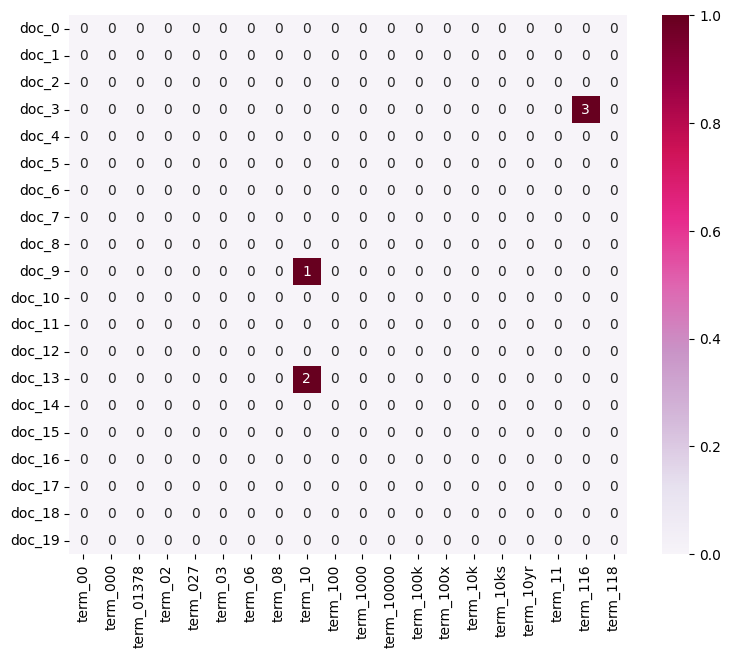

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

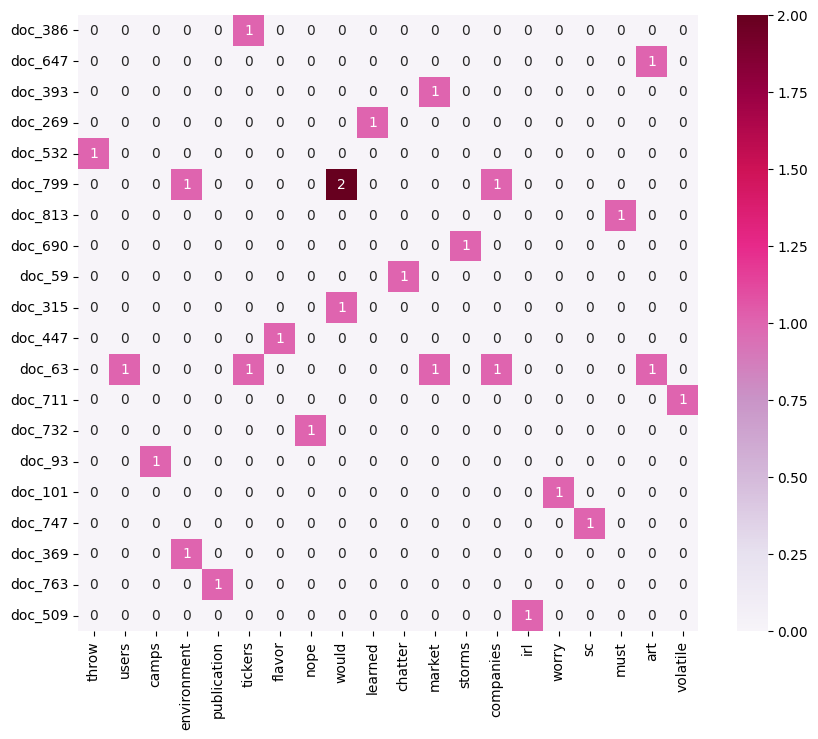

In [60]:
n_docs = 20
n_terms = 20

# randomly select terms
all_terms = np.arange(X_counts.shape[1])
terms_idx = np.random.choice(all_terms, n_terms, replace=False)

# ensure each term has at least one non-zero document
docs_set = set()
for term in terms_idx:
    docs_with_term = X_counts[:, term].nonzero()[0]
    if len(docs_with_term) > 0:
        docs_set.add(np.random.choice(docs_with_term))

# if not enough documents, randomly select more
all_docs = np.arange(X_counts.shape[0])
while len(docs_set) < n_docs:
    docs_set.add(np.random.choice(all_docs))

docs_idx = list(docs_set)[:n_docs]

# build sub-matrix
plot_matrix = X_counts[docs_idx][:, terms_idx].toarray()
plot_x = count_vect.get_feature_names_out()[terms_idx]
plot_y = [f"doc_{d}" for d in docs_idx]

df_plot = pd.DataFrame(plot_matrix, columns = plot_x, index = plot_y)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(df_plot,
                cmap = "PuRd",
                vmin = 0,
                vmax = df_plot.values.max(),
                annot = True, fmt = "d"
)


---

In [ ]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))


In [62]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [63]:
term_frequencies[0] #sum of first term: 00

np.int64(4)

/var/folders/0p/bgqykj_5115_m98bq1v0q_k40000gn/T/ipykernel_80200/3480579971.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


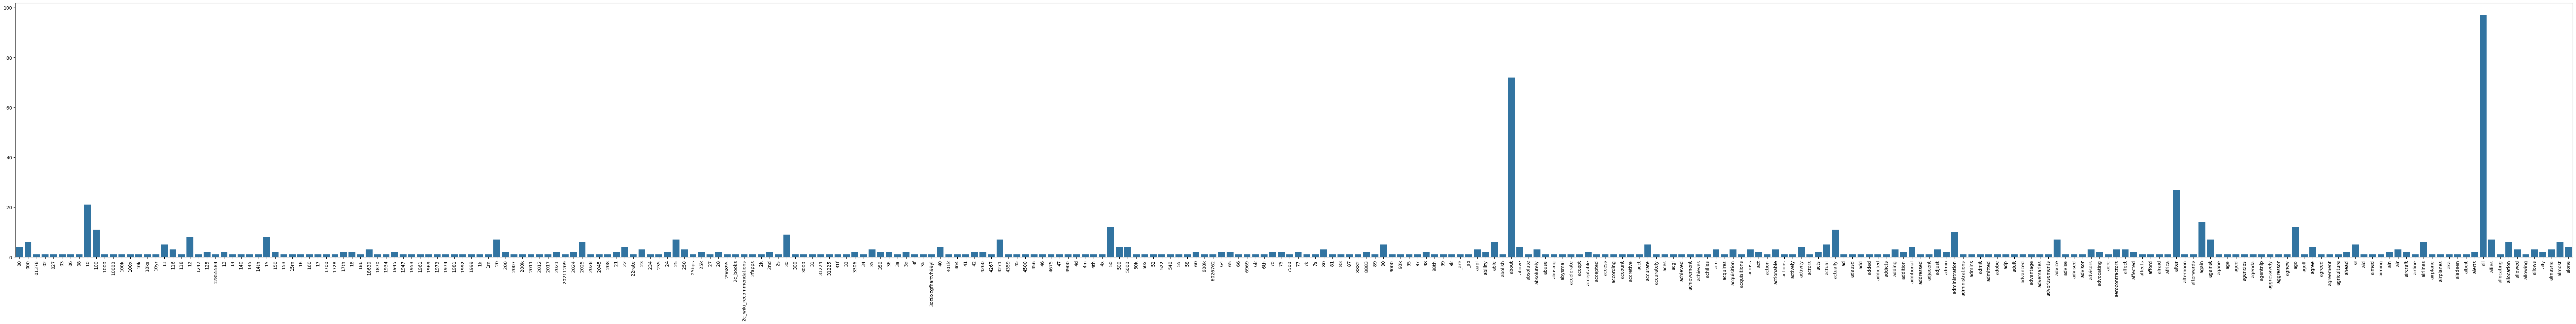

In [64]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [65]:
# Answer here
import plotly.express as px

# reference: https://plotly.com/python/plotly-express/
# first 300 terms and frequencies
term = count_vect.get_feature_names_out()[:300]

# plotly bar chart
fig = px.bar(x = term,
            y = term_frequencies[:300], 
            labels = {'x':'Term', 'y':'Frequency'}, 
            title = 'Term Frequency (first 300 terms)'
)

fig.update_xaxes(
    tickmode = 'array', # force x-axis to show
    tickvals = term, # values on x-axis
    ticktext = term, # labels on x-axis
    tickangle = 270,
    tickfont = dict(size = 8)
)

# adjust layout size
fig.update_layout(
    autosize = False,
    width = 2500,
    height = 600
)

fig.show()

In [66]:
# Answer here

terms = count_vect.get_feature_names_out()
freqs = term_frequencies

# top 300 most frequent terms
top_n = 300
indices = np.argsort(freqs)[::-1][:top_n] # indices sorted freqs in ascending order, then reverse
top_terms = terms[indices]
top_freqs = freqs[indices]

top_terms_sorted = sorted(top_terms) # sort selected terms alphabetically
freq_dict = dict(zip(top_terms, top_freqs)) # map each term to its frequency
top_freqs_sorted = [freq_dict[term] for term in top_terms_sorted] # reorder frequencies

# plotly bar chart
fig = px.bar(
    x = top_terms_sorted,
    y = top_freqs_sorted,
    labels = {'x': 'Term', 'y': 'Frequency'},
    title = f'Top {top_n} Frequent Terms'
)

fig.update_xaxes(
    tickmode = 'array', # force x-axis to show
    tickvals = top_terms_sorted, # values on x-axis
    ticktext = top_terms_sorted, # labels on x-axis
    tickangle = 270,
    tickfont = dict(size = 8)
)

# adjust layout size
fig.update_layout(
    autosize = False,
    width = 2500,
    height = 600
)

fig.show()

In [94]:
# Answer here

terms = count_vect.get_feature_names_out()
freqs = term_frequencies

# top 300 most frequent terms
top_n = 300
indices = np.argsort(freqs)[::-1][:top_n] # indices sorted freqs in ascending order, then reverse
top_terms = terms[indices]
top_freqs = freqs[indices]

# plotly bar chart
fig = px.bar(
    x = top_terms,
    y = top_freqs,
    labels = {'x': 'Term', 'y': 'Frequency'},
    title = f'Top {top_n} Terms by Frequency'
)

fig.update_xaxes(
    tickmode = 'array', # force x-axis to show
    tickvals = top_terms, # values on x-axis
    ticktext = top_terms, # labels on x-axis
    tickangle = 270,
    tickfont = dict(size = 8)
)

# adjust layout size
fig.update_layout(
    autosize = False,
    width = 2500,
    height = 600
)

fig.show()

In [67]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

/var/folders/0p/bgqykj_5115_m98bq1v0q_k40000gn/T/ipykernel_80200/2166548998.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



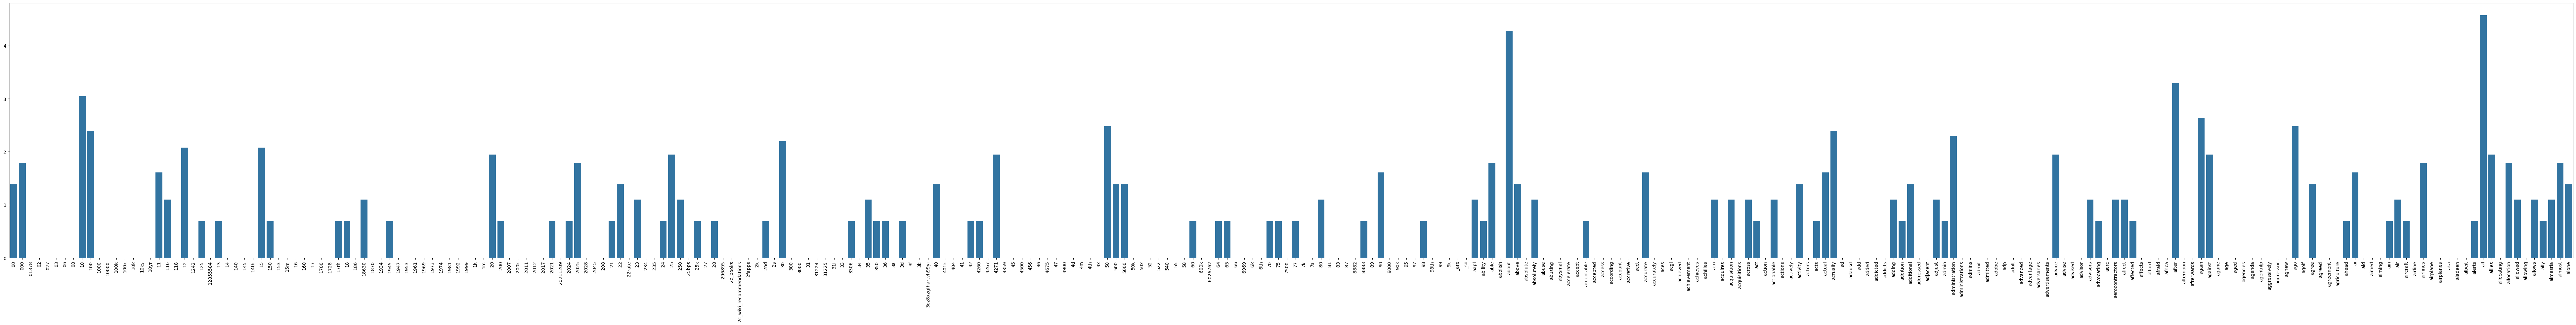

In [68]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [69]:
# Answer here

term = count_vect.get_feature_names_out()[:300]

# plotly bar chart
fig = px.bar(x = term,
            y = term_frequencies_log[:300], 
            labels = {'x':'Term', 'y':'Log Frequency'}, 
            title = 'Log Term Frequency (first 300 terms)'
)

fig.update_xaxes(
    tickmode = 'array', # force x-axis to show
    tickvals = term, # values on x-axis
    ticktext = term, # labels on x-axis
    tickangle = 270,
    tickfont = dict(size = 8)
)

# adjust layout size
fig.update_layout(
    autosize = False,
    width = 2500,
    height = 600
)

fig.show()

# it is copy and modify from exercise 12, in that chart, it shows real counts, and small frequencies terms are not visible.
# by using log scale, small frequency terms are more visible because it reduces the gap between large and small values.
# so it is more suitable for visualizing overall distribution patterns.